### Importaci√≥n de datos



In [41]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [50]:
# C√ÅLCULO DE LA RENTABILIDAD: GANANCIA BRUTA
# ----------------------------------------------------
# CORRECCI√ìN: La ganancia es el Precio - Costo de env√≠o. El n√∫mero de cuotas NO multiplica la ganancia.
df['Ganancia_Bruta'] = df['Precio'] - df['Costo de env√≠o']

# AN√ÅLISIS POR TIENDA USANDO LA NUEVA M√âTRICA
# ----------------------------------------------------
ganancia_por_tienda = df.groupby('tienda')['Ganancia_Bruta'].sum().sort_values(ascending=False)

print("Ganancia Bruta Total por Tienda (en millones):")
print(ganancia_por_tienda / 1_000_000) # Se divide por 1 mill√≥n para mostrar valores m√°s legibles

Ganancia Bruta Total por Tienda (en millones):
tienda
tienda_1    1089.5025
tienda_2    1056.8584
tienda_3    1039.5030
tienda_4     983.0583
Name: Ganancia_Bruta, dtype: float64


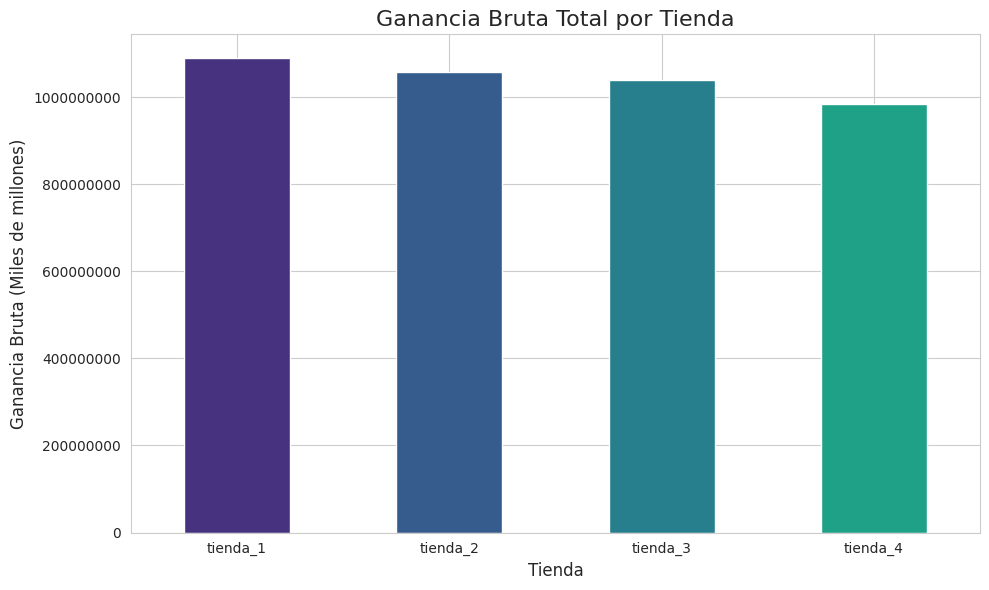

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraci√≥n b√°sica para los gr√°ficos
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Crear un gr√°fico de barras para la Ganancia Bruta
ganancia_por_tienda.plot(kind='bar', color=sns.color_palette("viridis"))
plt.title('Ganancia Bruta Total por Tienda', fontsize=16)
plt.ylabel('Ganancia Bruta (Miles de millones)', fontsize=12)
plt.xlabel('Tienda', fontsize=12)
plt.xticks(rotation=0) # Etiquetas horizontales
plt.ticklabel_format(style='plain', axis='y') # Quitar notaci√≥n cient√≠fica si es muy alta
plt.tight_layout()
plt.show()

La Tienda 1 sigue siendo la m√°s rentable. La Tienda 4 es la que menos dinero gana, confirmando su bajo desempe√±o.

# 2. Ventas por categor√≠a

In [44]:
# C√ÅLCULO DE LA DISTRIBUCI√ìN DE GANANCIAS POR CATEGOR√çA
# ----------------------------------------------------

# 1. Agrupar la Ganancia Bruta por Categor√≠a de Producto
ganancia_por_categoria = df.groupby('Categor√≠a del Producto')['Ganancia_Bruta'].sum()

# 2. Calcular el total de la Ganancia Bruta (para el porcentaje)
ganancia_total = ganancia_por_categoria.sum()

# 3. Convertir a Porcentaje del Total
porcentaje_ganancia = (ganancia_por_categoria / ganancia_total * 100).sort_values(ascending=False)

print("Distribuci√≥n Porcentual de la Ganancia Bruta por Categor√≠a:")
print(porcentaje_ganancia.round(2).astype(str) + ' %')

Distribuci√≥n Porcentual de la Ganancia Bruta por Categor√≠a:
Categor√≠a del Producto
Electr√≥nicos               37.32 %
Electrodom√©sticos          30.68 %
Muebles                    16.96 %
Instrumentos musicales      7.98 %
Deportes y diversi√≥n        3.29 %
Juguetes                    1.61 %
Art√≠culos para el hogar      1.3 %
Libros                      0.86 %
Name: Ganancia_Bruta, dtype: object


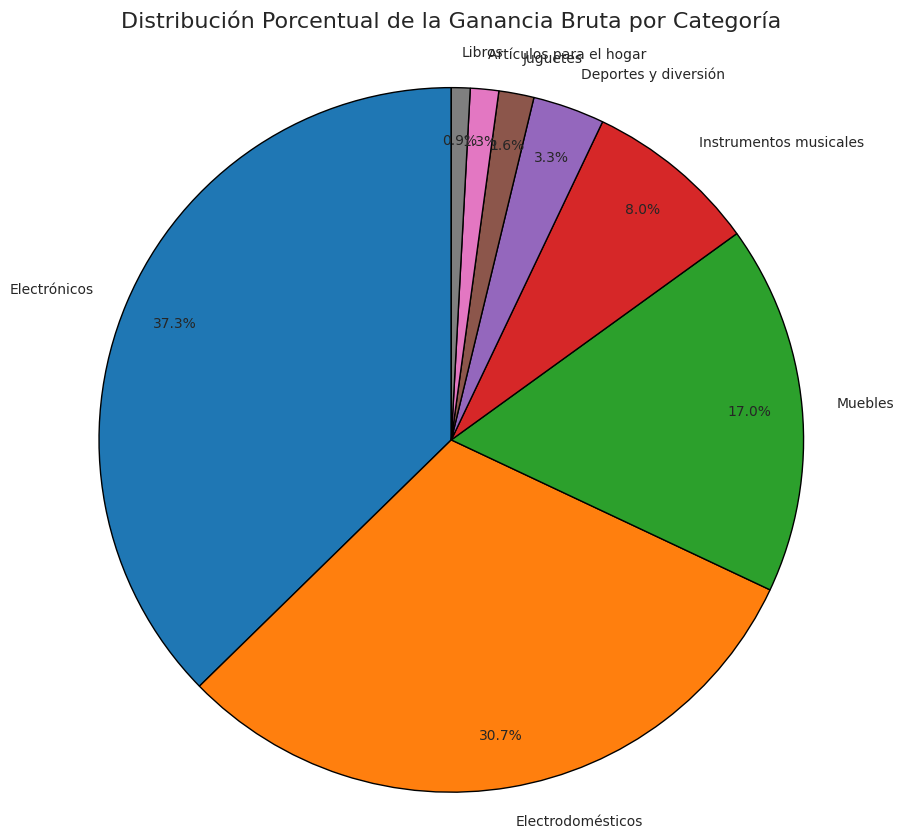

In [45]:
# GR√ÅFICO DE DISTRIBUCI√ìN DE GANANCIAS (GR√ÅFICO DE TORTA)
# ----------------------------------------------------

plt.figure(figsize=(10, 10))

# Usamos el porcentaje_ganancia calculado antes
plt.pie(
    porcentaje_ganancia,
    labels=porcentaje_ganancia.index,
    autopct='%1.1f%%', # Formato para mostrar el porcentaje con un decimal
    startangle=90,
    pctdistance=0.85, # Distancia del texto del porcentaje desde el centro
    wedgeprops={'edgecolor': 'black'} # Borde entre las secciones
)

plt.title('Distribuci√≥n Porcentual de la Ganancia Bruta por Categor√≠a', fontsize=16, pad=20)
plt.axis('equal') # Para que el gr√°fico sea un c√≠rculo perfecto
plt.show()

Mas del 50% de toda la ganancia viene de dos √∫nicas categor√≠as. El negocio depende mucho de su √©xito.

# 3. Calificaci√≥n promedio de la tienda




In [46]:
# AN√ÅLISIS DE LA DISTRIBUCI√ìN DE CALIFICACIONES POR TIENDA
# ----------------------------------------------------------------

# 1. Agrupar por 'tienda' y luego contar la frecuencia de cada 'Calificaci√≥n'
# pd.crosstab es ideal para esto: cruza dos columnas y cuenta las ocurrencias
conteo_calificaciones = pd.crosstab(
    df['tienda'],
    df['Calificaci√≥n'],
    normalize='index' # Usamos normalize='index' para obtener proporciones (porcentajes) por tienda
) * 100 # Multiplicamos por 100 para tener el valor en porcentaje

print("Distribuci√≥n Porcentual de Calificaciones (por Tienda):")
print(conteo_calificaciones.round(2).astype(str) + ' %')

Distribuci√≥n Porcentual de Calificaciones (por Tienda):
Calificaci√≥n        1       2       3        4        5
tienda                                                 
tienda_1      13.52 %  3.65 %  9.24 %  18.82 %  54.77 %
tienda_2      11.57 %  3.94 %  8.86 %  20.43 %  55.19 %
tienda_3      12.59 %  3.35 %  8.18 %   18.4 %  57.48 %
tienda_4      13.15 %   3.6 %  8.91 %  19.21 %  55.13 %


<Figure size 1200x700 with 0 Axes>

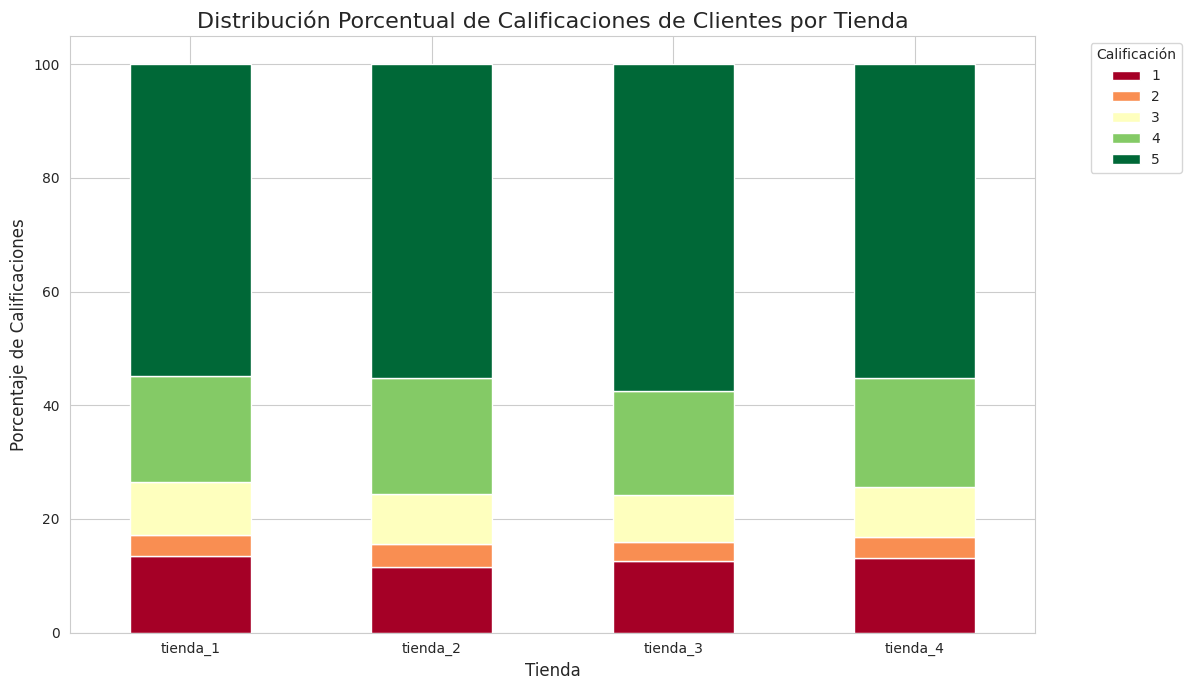

In [47]:
# GR√ÅFICO DE BARRAS APILADAS DE CALIFICACIONES
# ----------------------------------------------------------------

plt.figure(figsize=(12, 7))

# Crear el gr√°fico de barras apiladas al 100%
# Usamos el dataframe 'conteo_calificaciones' con el porcentaje de cada nota
conteo_calificaciones.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    cmap='RdYlGn' # Mapa de color que va de Rojo (malo) a Verde (bueno)
)

plt.title('Distribuci√≥n Porcentual de Calificaciones de Clientes por Tienda', fontsize=16)
plt.ylabel('Porcentaje de Calificaciones', fontsize=12)
plt.xlabel('Tienda', fontsize=12)
plt.xticks(rotation=0) # Mantiene las etiquetas de la tienda horizontales
plt.legend(title='Calificaci√≥n', bbox_to_anchor=(1.05, 1), loc='upper left') # Mover la leyenda fuera
plt.tight_layout()
plt.show()

En este caso podemos ver que las 4 tiendas tienen rese√±as muy similares

# 4. Productos m√°s y menos vendidos

üí∞ Top 5 Productos m√°s Valiosos (por Ganancia Bruta Total):
Producto
TV LED UHD 4K       1200721000
Iphone 15           1181672300
Refrigerador        1116986000
Smart TV             793288300
Lavadora de ropa     710992800
Name: Ganancia_Bruta, dtype: int64


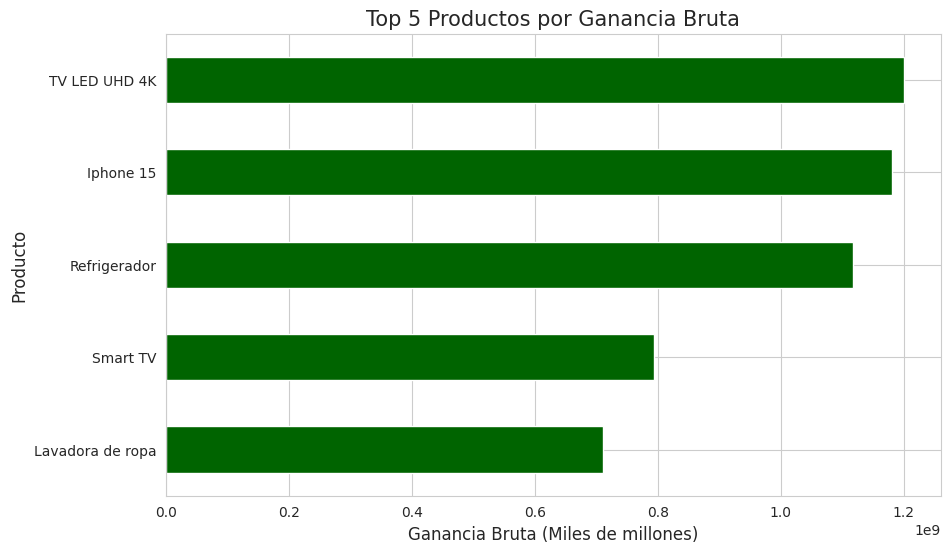

In [48]:
# TOP 5 PRODUCTOS POR GANANCIA BRUTA
# ----------------------------------------------------

# 1. Agrupar la Ganancia Bruta (columna creada previamente) por 'Producto'
ganancia_por_producto = df.groupby('Producto')['Ganancia_Bruta'].sum()

# 2. Seleccionar los 5 productos con la mayor ganancia
top_5_ganancia = ganancia_por_producto.nlargest(5)

print("üí∞ Top 5 Productos m√°s Valiosos (por Ganancia Bruta Total):")
print(top_5_ganancia.round(0).astype(int))

# 3. Opcional: Graficar el Top 5
plt.figure(figsize=(10, 6))
top_5_ganancia.sort_values(ascending=True).plot(kind='barh', color='darkgreen') # Usamos barh (horizontal)
plt.title('Top 5 Productos por Ganancia Bruta', fontsize=15)
plt.xlabel('Ganancia Bruta (Miles de millones)', fontsize=12)
plt.ylabel('Producto', fontsize=12)
plt.show()


‚≠ê  Productos con la Peor Calificaci√≥n Promedio:
Producto
Set de vasos                 3.85
Modelado predictivo          3.86
Mesa de centro               3.90
Auriculares con micr√≥fono    3.91
Guitarra ac√∫stica            3.91
Name: Calificaci√≥n, dtype: float64


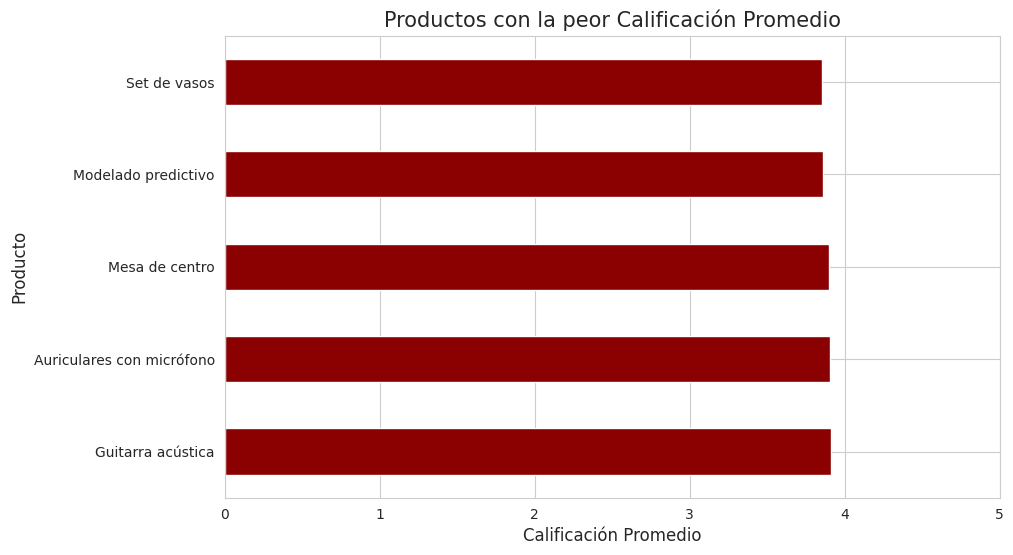

In [36]:
# PRODUCTOS CON LA PEOR CALIFICACI√ìN PROMEDIO
# ----------------------------------------------------

# 1. Agrupar la Calificaci√≥n promedio por 'Producto'
calificacion_por_producto = df.groupby('Producto')['Calificaci√≥n'].mean()

# 2. Seleccionar los 5 productos con la peor calificaci√≥n
bottom_5_calificacion = calificacion_por_producto.nsmallest(5)

print("\n‚≠ê  Productos con la Peor Calificaci√≥n Promedio:")
print(bottom_5_calificacion.round(2))

# 3. Opcional: Graficar el
plt.figure(figsize=(10, 6))
bottom_5_calificacion.sort_values(ascending=False).plot(kind='barh', color='darkred') # Usamos barh (horizontal)
plt.title('Productos con la peor Calificaci√≥n Promedio', fontsize=15)
plt.xlabel('Calificaci√≥n Promedio', fontsize=12)
plt.ylabel('Producto', fontsize=12)
plt.xlim(0, 5) # Establecer el l√≠mite del eje y en la escala de calificaci√≥n
plt.show()

Ganancia: El producto TV LED UHD 4K es el que m√°s valor genera. Riesgo: El producto Set de vasos tiene la peor calificaci√≥n promedio.

# 5. Env√≠o promedio por tienda

In [34]:
# AN√ÅLISIS DEL IMPACTO DEL COSTO DE ENV√çO EN LA GANANCIA
# ----------------------------------------------------

# 1. Crear una nueva m√©trica: Porcentaje del Costo de Env√≠o sobre la Ganancia Unitaria
# Evitamos la divisi√≥n por cero usando np.where
# Asumimos que la Ganancia_Unitaria (Precio - Costo de env√≠o) es el denominador.
# Si la Ganancia_Unitaria es 0 o negativa, asignamos un valor alto (ej: 1000) para indicar muy mala eficiencia.
import numpy as np

df['Costo_sobre_Ganancia'] = np.where(
    df['Ganancia_Unitaria'] > 0,
    (df['Costo de env√≠o'] / df['Ganancia_Unitaria']) * 100,
    1000 # Asignamos un 1000% si el costo es mayor o igual a la ganancia unitaria
)

# 2. Calcular el promedio de esta m√©trica (Costo sobre Ganancia) por Tienda
impacto_envio_promedio = df.groupby('tienda')['Costo_sobre_Ganancia'].mean().sort_values(ascending=False)

print("Impacto Promedio del Costo de Env√≠o en la Ganancia Bruta (Porcentaje):")
print(impacto_envio_promedio.round(2).astype(str) + ' %')

Impacto Promedio del Costo de Env√≠o en la Ganancia Bruta (Porcentaje):
tienda
tienda_2    6.51 %
tienda_1    6.27 %
tienda_4    6.12 %
tienda_3    5.87 %
Name: Costo_sobre_Ganancia, dtype: object


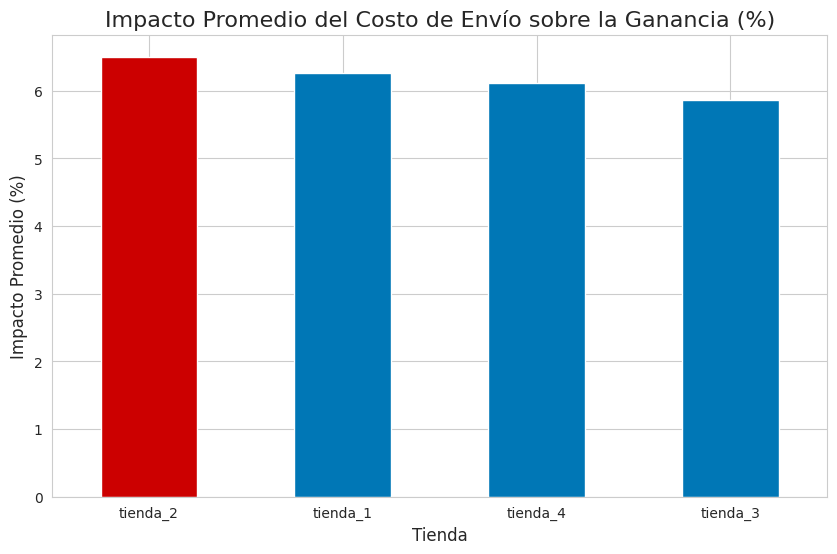

In [35]:
# GR√ÅFICO DEL IMPACTO PROMEDIO DEL ENV√çO EN LA RENTABILIDAD
# ----------------------------------------------------

plt.figure(figsize=(10, 6))

impacto_envio_promedio.plot(
    kind='bar',
    color=['#CC0000' if x == impacto_envio_promedio.max() else '#0077B6' for x in impacto_envio_promedio] # Colorea de rojo la tienda con mayor impacto
)

plt.title('Impacto Promedio del Costo de Env√≠o sobre la Ganancia (%)', fontsize=16)
plt.ylabel('Impacto Promedio (%)', fontsize=12)
plt.xlabel('Tienda', fontsize=12)
plt.xticks(rotation=0)
plt.show()

# 5. Conclusi√≥n General

La recomendaci√≥n es cerrar la Tienda 4 para liberar capital y recursos que puedan ser invertidos en las tiendas m√°s rentables (Tienda 1 y Tienda 2).

1. Fracaso Financiero (Baja Rentabilidad e Ineficiencia)
La Tienda 4 no cumple con el objetivo principal de generar valor:

M√≠nima Ganancia: Es la que menos dinero genera de las cuatro tiendas.

Mala Gesti√≥n de Costos: A pesar de tener el costo de env√≠o m√°s bajo en n√∫meros absolutos, es la menos eficiente. El costo de env√≠o se come el mayor porcentaje de su ganancia unitaria, indicando que vende productos de muy bajo margen que no justifican su operaci√≥n.

2. Riesgo de Reputaci√≥n (Baja Calidad del Servicio)
La Tienda 4 es una fuente de riesgo para la marca:

Servicio Inconsistente: Es la tienda con la mayor proporci√≥n de calificaciones negativas (1 y 2 estrellas). Esto demuestra fallas graves y frecuentes en la experiencia del cliente.

3. S√≠ntesis de la Decisi√≥n
La Tienda 4 no solo es la que menos factura y menos gana, sino que su operaci√≥n es ineficiente y pone en riesgo la reputaci√≥n de la marca debido a la alta frecuencia de quejas (malas calificaciones).

Cerrar la Tienda 4 es una decisi√≥n estrat√©gica que elimina una p√©rdida continua de recursos y riesgo de reputaci√≥n, permitiendo enfocar la inversi√≥n en las sucursales m√°s exitosas.